# Clasificación de correos de spam con modelo de Decision Tree


In [ ]:
%pip install pandas numpy matplotlib seaborn ucimlrepo scikit-learn

In [36]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import seaborn as sns


Traemos el dataset directamente de ucirepo debido a un error en las variables con la version de descarga

In [73]:
spambase = fetch_ucirepo(id=94) 
data = spambase.data.original

data.info()
if any(data.isnull().sum()>0): print("Missing values") 
else: print("No missing values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [38]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


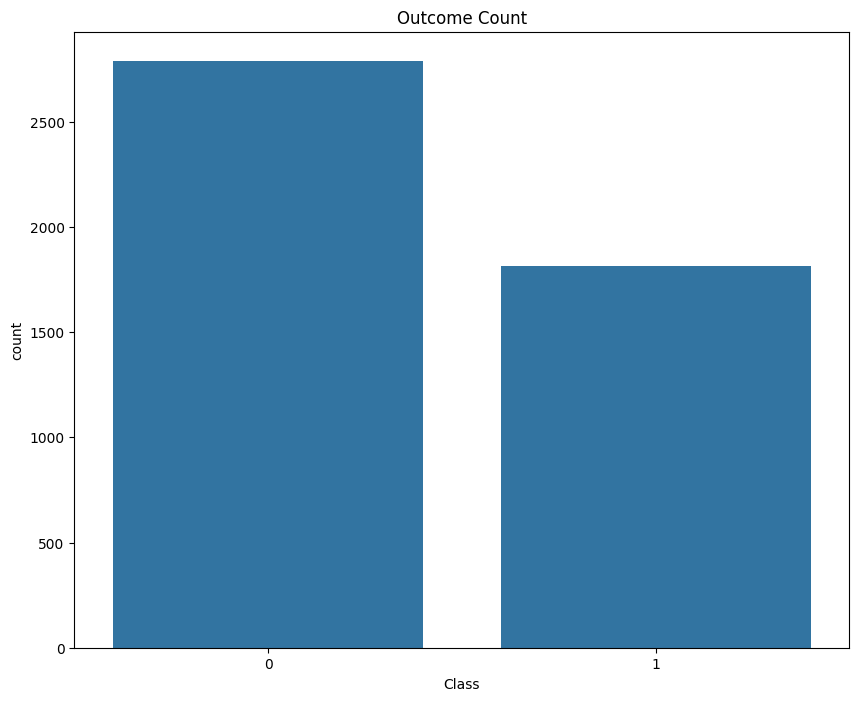

In [39]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Class',data=data)
plt.title("Outcome Count")
plt.show()

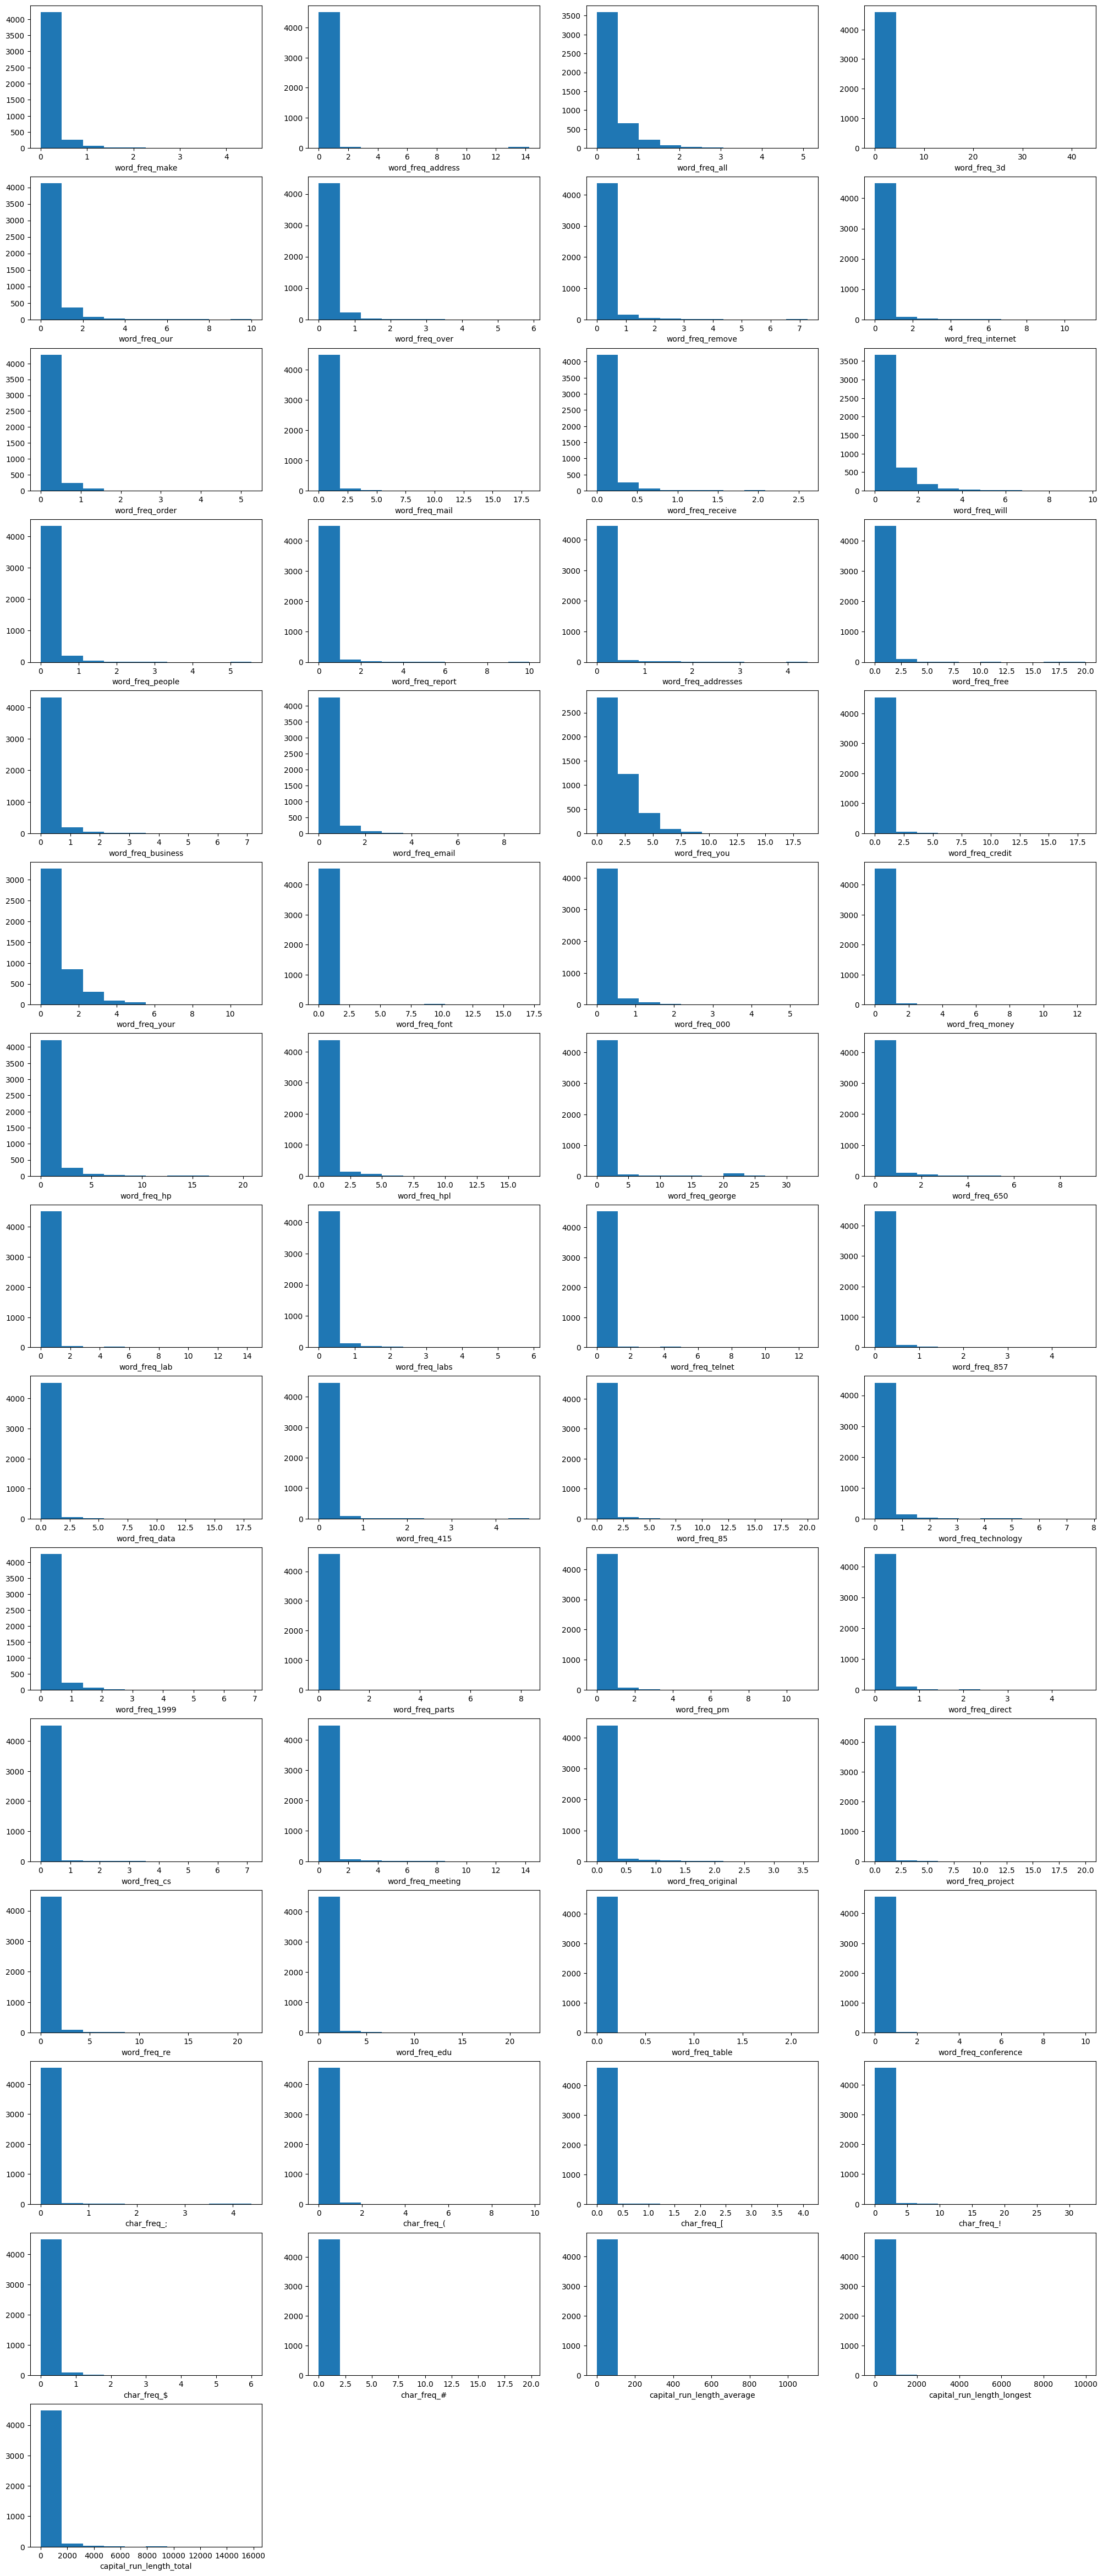

In [114]:
rows, cols = 15,4
fig, axes = plt.subplots(nrows=rows,ncols=cols ,figsize=(25,60))   

# not_norm_attributes
current_col = 0
for i in range(rows):
    for j in range(cols):
        if current_col < len(data.columns)-1:
            # sns.kdeplot(data=data , x=data[data.columns[current_col]],ax=axes[i][j])
            axes[i][j].hist(x=data[data.columns[current_col]])
            axes[i][j].set_xlabel(data.columns[current_col])
            current_col +=1
        else:
            axes[i, j].axis('off')


plt.show()


word_freq_857  word_freq_415    0.9578
word_freq_415  word_freq_857    0.9578
dtype: float64


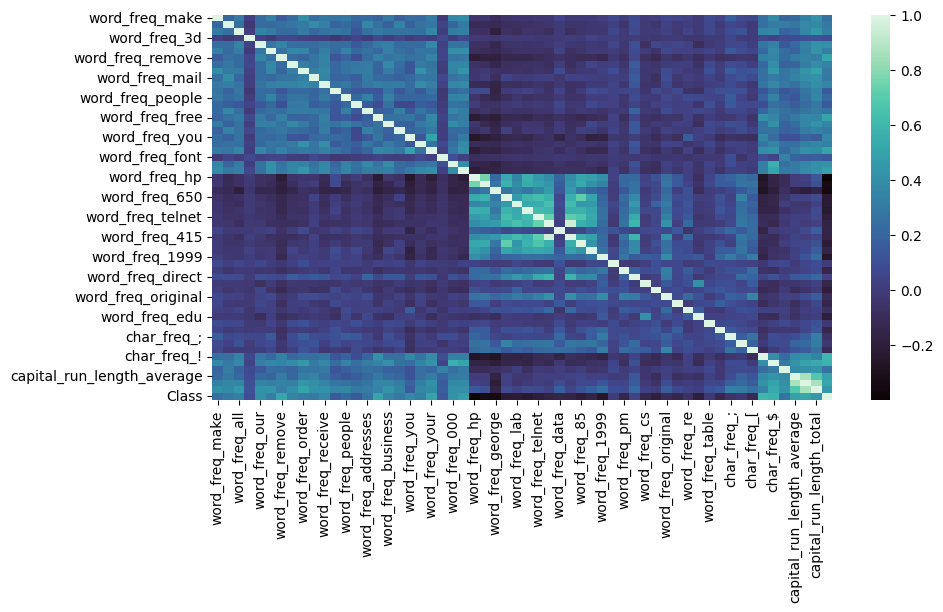

In [77]:
#matriz de correlación
cor_matrix = data.corr(method="spearman").round(4)
cor = cor_matrix.where(cor_matrix > 0.95).stack().dropna()
cor = cor[cor.index.get_level_values(0) != cor.index.get_level_values(1) ]
print(cor)
plt.figure(figsize=(10,5))
sns.heatmap(data=cor_matrix, cmap="mako")
high_cor = []

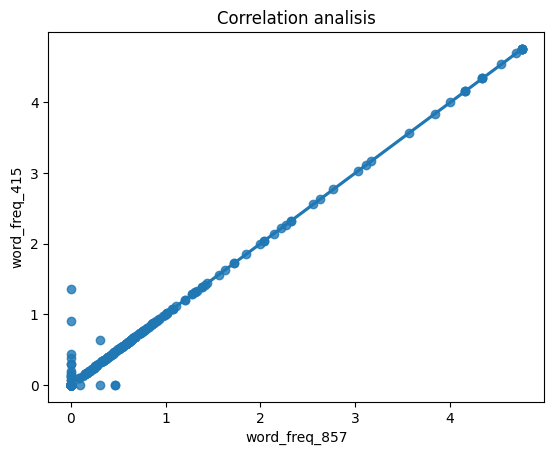

In [42]:
#observando relaciones entre los datos
plt.title('Correlation analisis')
sns.regplot(y='word_freq_415', x='word_freq_857', data=data);
plt.show()

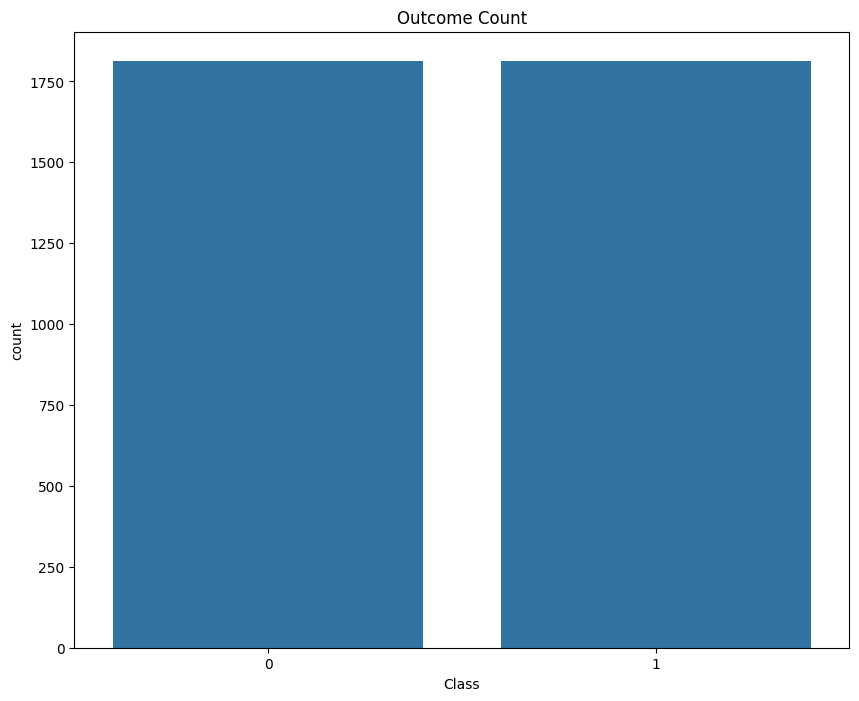

In [43]:
from sklearn.utils import resample

spam_data, no_spam_data = data[data['Class'] == 1], data[data['Class'] == 0]
desired_size = len(spam_data)

no_spam_data_resampled = resample(no_spam_data, replace=False, n_samples=desired_size, random_state=69) 
resampled_data = pd.concat([no_spam_data_resampled, spam_data])

#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='Class',data=resampled_data)
plt.title("Outcome Count")
plt.show()